In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
np.random.seed(sum(map(ord, "aesthetics")))

TypeError: Cannot cast array from dtype('O') to dtype('int64') according to the rule 'safe'

In [8]:
#Lets load data from train and test datasets
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')

In [9]:
## How many users are in training set and test set
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [10]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis=0, ignore_index=True)

In [11]:
# Remove ID's since now we are not interested in making predictions
# As of nw don't delete
users.drop('id',axis=1, inplace=True)

users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,en,Web,0,basic,20091208061105


## Untouched missing data 
 #### Viewing the data: gender column has certain values being '-unknown-'. Lets transform these values into NaN.
    

In [12]:
users.gender.replace('-unknown-', np.nan, inplace=True)

In [13]:
## How much data we are missing?
## Compute NaN percentage of each feature.
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

age                        42.412365
country_destination        22.535538
date_first_booking         67.733998
first_affiliate_tracked     2.208335
gender                     46.990169
dtype: float64

In [14]:
## age
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [15]:
print(sum(users.age > 122))
print(sum(users.age < 18))

830
188


In [16]:
users[users.age > 122]['age'].describe()
## seems cause due to appearance of 2014 - wrong input

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [17]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

#### Summary: The young users seems to be under an acceptable range being the 50% of those users above 16 years old. We need to hande the outliers. Simple solution set an acceptable range and put others as NaN.


In [18]:
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

## Now, lets focus on CATEGORICAL data types

In [19]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

In [20]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active // 1000000), format='%Y%m%d')

In [21]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105,2009-12-08


## Data Visualization

#### [1] Gender

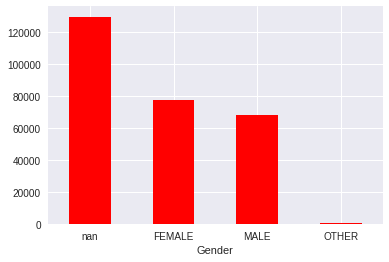

In [22]:

users.gender.value_counts(dropna=False).plot(kind='bar', color='red', rot=0)
plt.xlabel('Gender')
sns.despine()

### Is there any gender preferences when travelling?


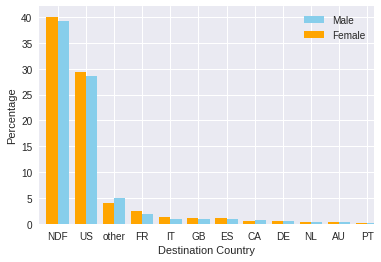

In [23]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='skyblue', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='orange', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

#### Summary: no big difference between genders, but we find relative destination frequency of the countries.

### [2] Age

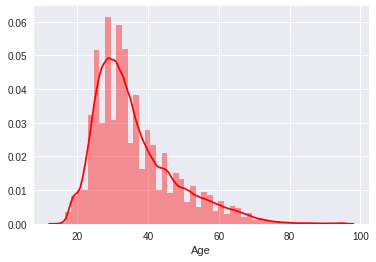

In [24]:
sns.distplot(users.age.dropna(), color='red')
plt.xlabel('Age')
sns.despine()

### Summary: The common age to travel is between 25 and 40-45.
   #### How about older people, do they travel in a different way?
   #### Lets take arbitrary age (45) and split into two groups.
    

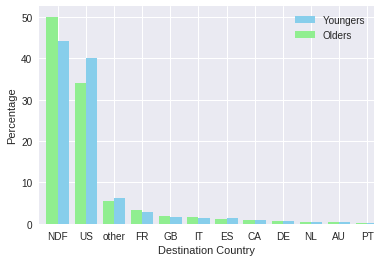

In [26]:
age = 45

younger = sum(users.loc[users['age'] < age, 'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age, 'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age, 'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age, 'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='skyblue', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='lightgreen', position=1, label='Olders', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

### Summary: 
    
   #### The young people tends to stay in the US, and the older people choose to travel outside the country.
   #### But there are no big differences.
   #### Remember we do not have 42% of the ages.
    

    

### [3] Dates

#### plot number of user accounts created over time


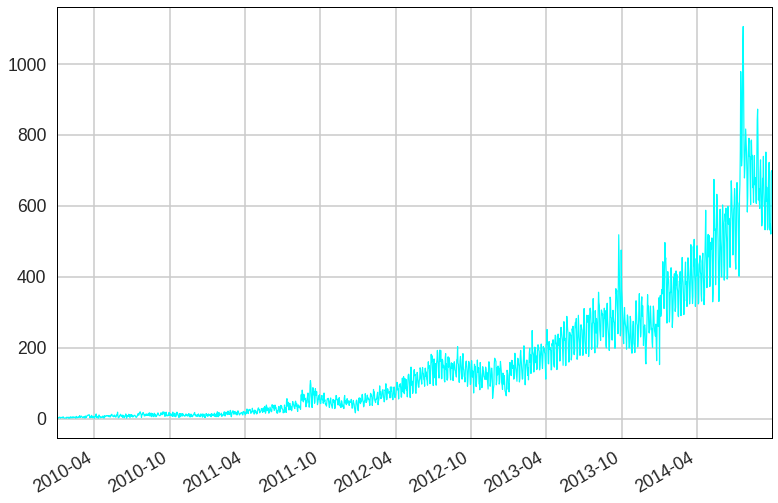

In [27]:

sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='cyan')


### Summary: 
#### We find how fast travel agency has grown over the last few years. 
#### Does this correlate with the date when the user was active for the first time? 
#### It should be very similar, so doing this is a way to check the data!


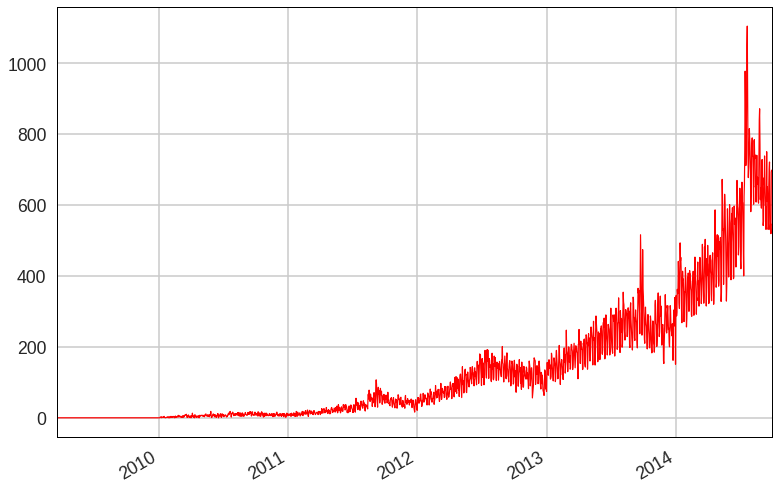

In [28]:
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')

### Summary: 
   #### We see almost same results as date_account_created.
   #### Lets notice the small peaks by digging into the peaks.
    

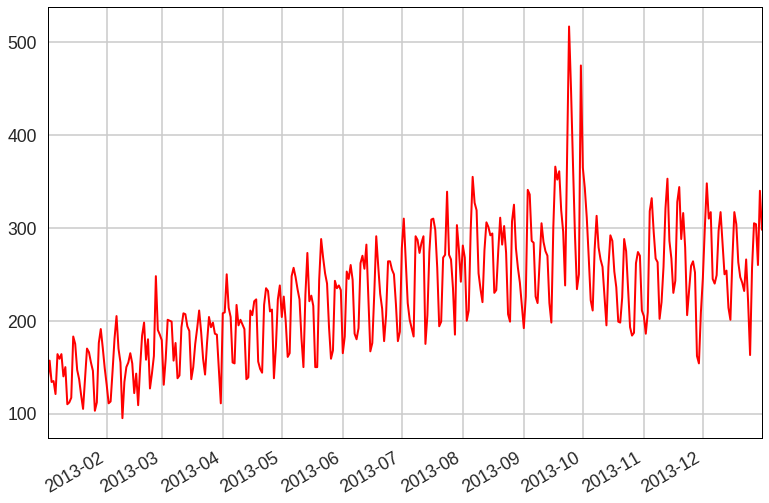

In [29]:
## lets select 2013 year

users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='red')
plt.show()


### Summary:
  ####  Small pattern - some peaks at same distance
  ####  Lets look more closely
    

In [30]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

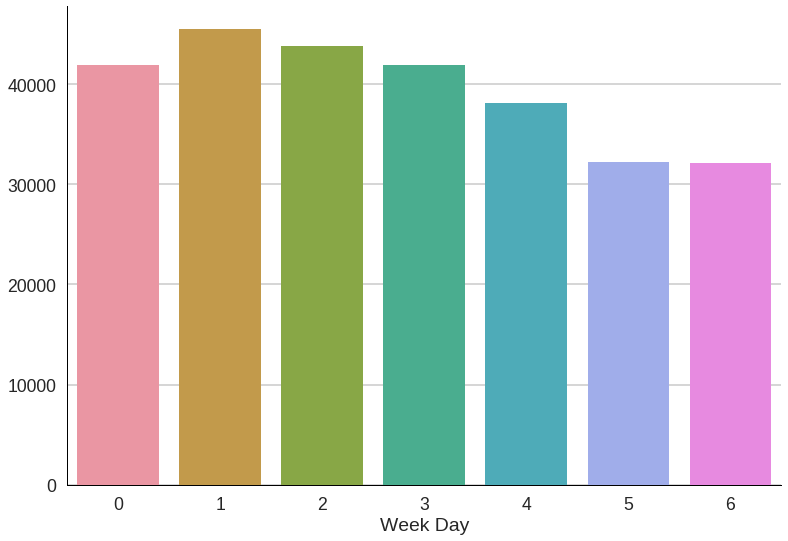

In [31]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

### HW - Can you find some distinctions between 'date_first_active' and 'date_account_created' relating to 'country_destination'?

##### Ask more questions... solve

### HW - Try making plots about devices and signups
### HW - Work on other attributes also

In [68]:
## device and signup


In [32]:
users.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105,2009-12-08


In [33]:
dfa = users['date_first_active']
dac = users['date_account_created']
ctry=users['country_destination']

## plot for device and signups

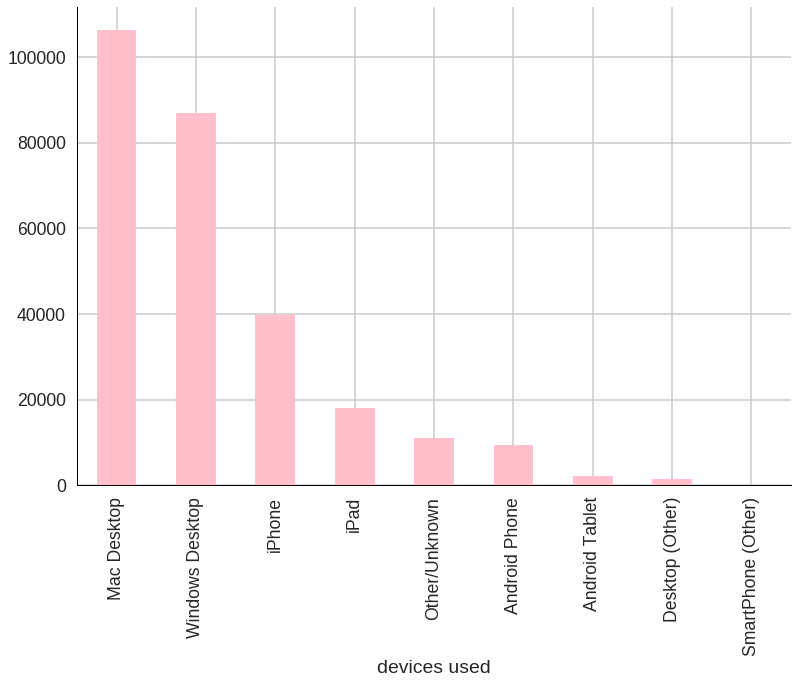

In [86]:
users.first_device_type.value_counts(dropna=False).plot(kind='bar', color='pink')
plt.xlabel('devices used')
sns.despine()

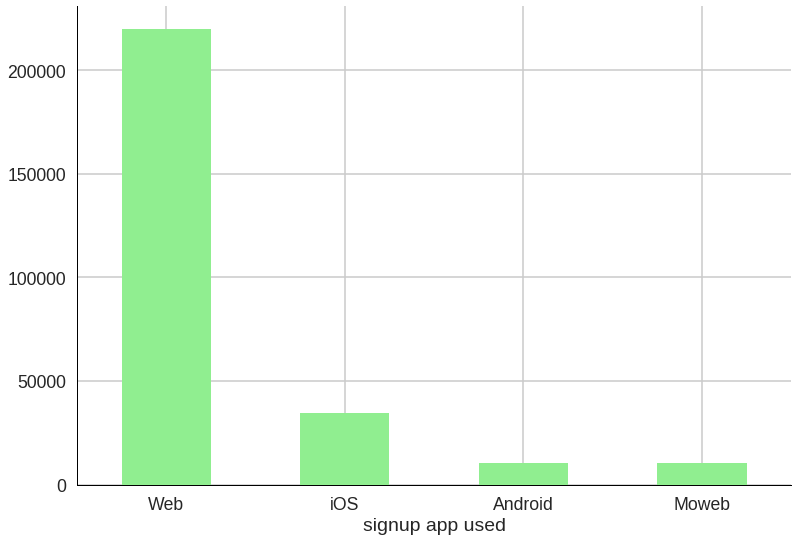

In [87]:
users.signup_app.value_counts(dropna=False).plot(kind='bar', color='lightgreen', rot=0)
plt.xlabel('signup app used')
sns.despine()

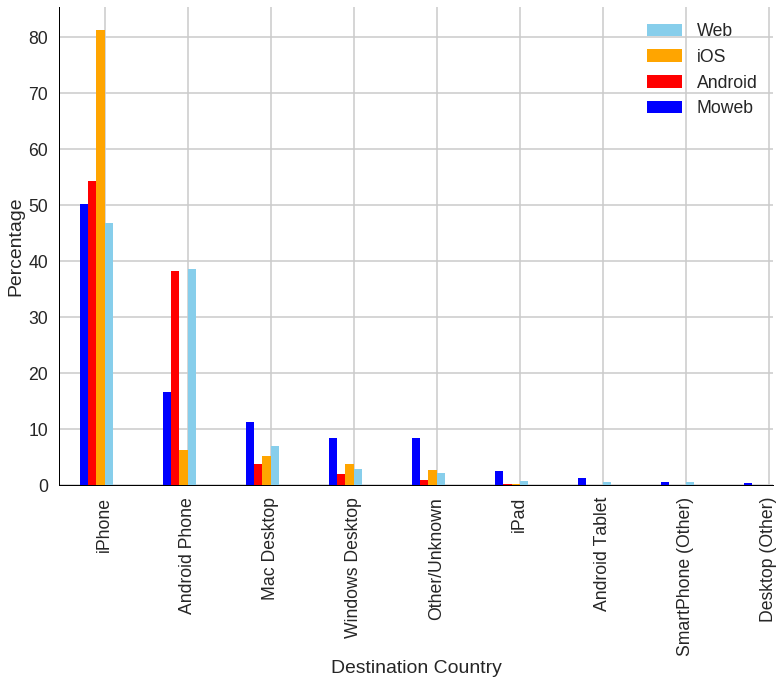

In [73]:
a = sum(users['signup_app'] == 'Web')
b = sum(users['signup_app'] == 'iOS')
c = sum(users['signup_app'] == 'Android')
d = sum(users['signup_app'] == 'Moweb')

aa = users.loc[users['signup_app'] == 'Web', 'first_device_type'].value_counts() / a * 100
bb = users.loc[users['signup_app'] == 'iOS', 'first_device_type'].value_counts() / b * 100
cc = users.loc[users['signup_app'] == 'Android', 'first_device_type'].value_counts() / c * 100
dd = users.loc[users['signup_app'] == 'Moweb', 'first_device_type'].value_counts() / d * 100

# Bar width
width = 0.1

aa.plot(kind='bar', width=width, color='skyblue', position=0, label='Web')
bb.plot(kind='bar', width=width, color='orange', position=1, label='iOS')
cc.plot(kind='bar', width=width, color='red', position=2, label='Android')
dd.plot(kind='bar', width=width, color='blue', position=3, label='Moweb')

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

## date account created , first active comparision and country destination

In [71]:

abc=users[['date_account_created','date_first_active','country_destination']]
abc.head()

,date_account_created,date_first_active,country_destination
0,2010-06-28,2009-03-19,NDF
1,2011-05-25,2009-05-23,NDF
2,2010-09-28,2009-06-09,US
3,2011-12-05,2009-10-31,other
4,2010-09-14,2009-12-08,US


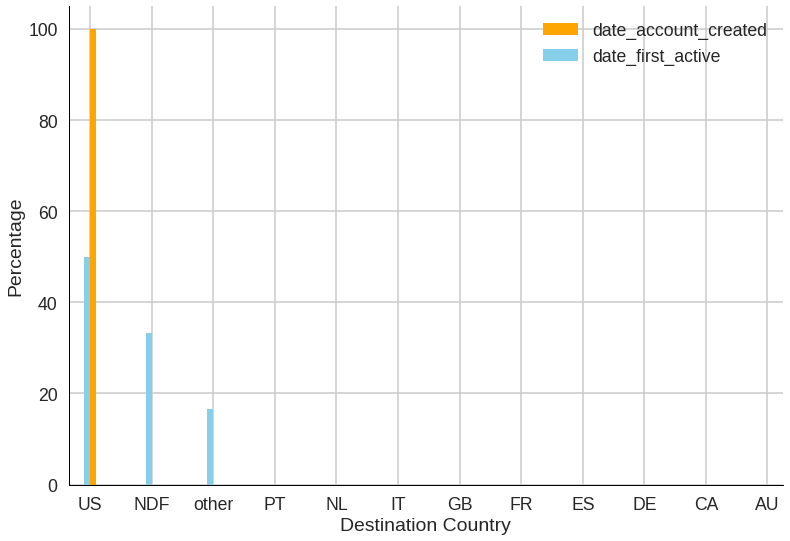

In [88]:
#graph of date_account_created and date_first_active Vs country_destination
dac = sum(users.loc[users['date_account_created'] <= pd.to_datetime(2010, format='%Y'),'country_destination'].value_counts())
dfa = sum(users.loc[users['date_first_active'] <= pd.to_datetime(2010, format='%Y'),'country_destination'].value_counts())

dac1= users.loc[users['date_account_created'] <= pd.to_datetime(2010, format='%Y'), 'country_destination'].value_counts() /dac * 100
dfa1= users.loc[users['date_first_active'] <= pd.to_datetime(2010, format='%Y'), 'country_destination'].value_counts() /dfa * 100
dac1.plot(kind='bar', width=0.1, color='orange', position=0, label='date_account_created', rot=0)
dfa1.plot(kind='bar', width=0.1, color='skyblue', position=1, label='date_first_active', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()



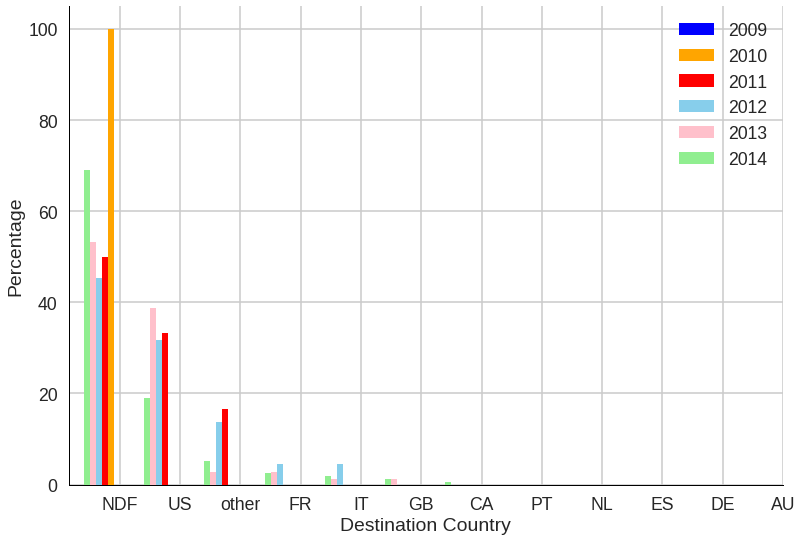

In [63]:
# data account created throughout the year in different countries
u = sum(users['date_account_created'] == pd.to_datetime(2009, format='%Y'))
v = sum(users['date_account_created'] == pd.to_datetime(2010, format='%Y'))
w = sum(users['date_account_created'] == pd.to_datetime(2011, format='%Y'))
x = sum(users['date_account_created'] == pd.to_datetime(2012, format='%Y'))
y = sum(users['date_account_created'] == pd.to_datetime(2013, format='%Y'))
z = sum(users['date_account_created'] == pd.to_datetime(2014, format='%Y'))

uu = users.loc[users['date_account_created'] == pd.to_datetime(2009, format='%Y'), 'country_destination'].value_counts() / u * 100
vv = users.loc[users['date_account_created'] == pd.to_datetime(2010, format='%Y'), 'country_destination'].value_counts() / v * 100
ww = users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() / w * 100
xx = users.loc[users['date_account_created'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() / x * 100
yy = users.loc[users['date_account_created'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() / y * 100
zz = users.loc[users['date_account_created'] == pd.to_datetime(2014, format='%Y'), 'country_destination'].value_counts() / z * 100                                                               

# Bar width
width = 0.1

uu.plot(kind='bar', width=width, color='blue', position=1, label='2009', rot=0)
vv.plot(kind='bar', width=width, color='orange', position=2, label='2010', rot=0)
ww.plot(kind='bar', width=width, color='red', position=3, label='2011', rot=0)
xx.plot(kind='bar', width=width, color='skyblue', position=4, label='2012', rot=0)
yy.plot(kind='bar', width=width, color='pink', position=5, label='2013', rot=0)
zz.plot(kind='bar', width=width, color='lightgreen', position=6, label='2014', rot=0)                                                               

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()


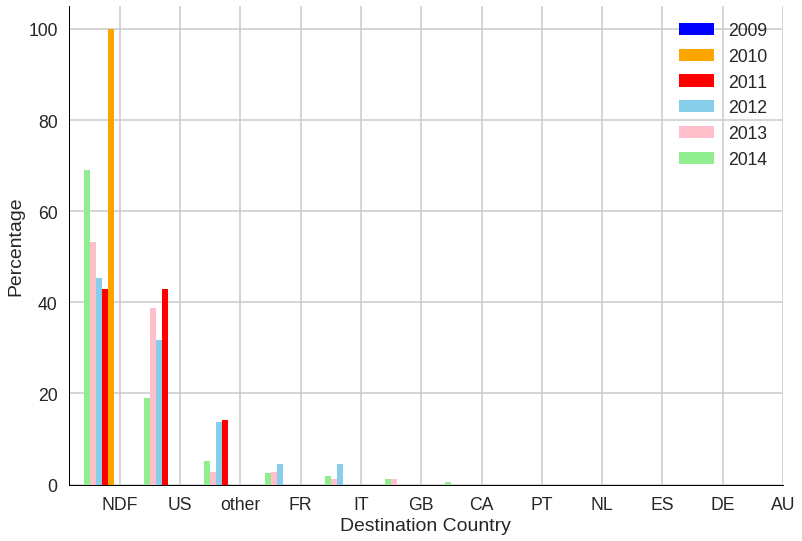

In [65]:
# data first active throughout the year in different countries
p = sum(users['date_first_active'] == pd.to_datetime(2009, format='%Y'))
q = sum(users['date_first_active'] == pd.to_datetime(2010, format='%Y'))
r = sum(users['date_first_active'] == pd.to_datetime(2011, format='%Y'))
s = sum(users['date_first_active'] == pd.to_datetime(2012, format='%Y'))
t = sum(users['date_first_active'] == pd.to_datetime(2013, format='%Y'))
l = sum(users['date_first_active'] == pd.to_datetime(2014, format='%Y'))

pp = users.loc[users['date_first_active'] == pd.to_datetime(2009, format='%Y'), 'country_destination'].value_counts() / p * 100
qq = users.loc[users['date_first_active'] == pd.to_datetime(2010, format='%Y'), 'country_destination'].value_counts() / q * 100
rr = users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() / r * 100
ss = users.loc[users['date_first_active'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() / s * 100
tt = users.loc[users['date_first_active'] == pd.to_datetime(2013, format='%Y'), 'country_destination'].value_counts() / t * 100
ll = users.loc[users['date_first_active'] == pd.to_datetime(2014, format='%Y'), 'country_destination'].value_counts() / l * 100                                                               

# Bar width
width = 0.1

pp.plot(kind='bar', width=width, color='blue', position=1, label='2009', rot=0)
qq.plot(kind='bar', width=width, color='orange', position=2, label='2010', rot=0)
rr.plot(kind='bar', width=width, color='red', position=3, label='2011', rot=0)
ss.plot(kind='bar', width=width, color='skyblue', position=4, label='2012', rot=0)
tt.plot(kind='bar', width=width, color='pink', position=5, label='2013', rot=0)
ll.plot(kind='bar', width=width, color='lightgreen', position=6, label='2014', rot=0)                                                               

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()


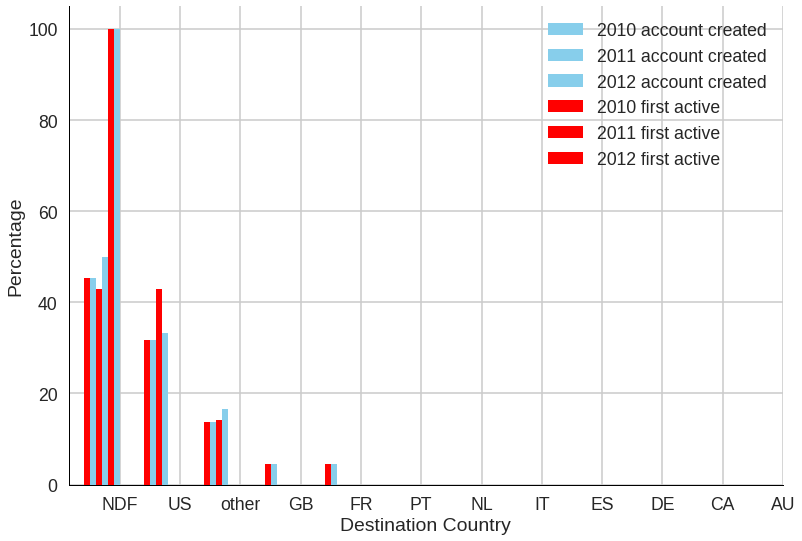

In [70]:
v = sum(users['date_account_created'] == pd.to_datetime(2010, format='%Y'))
w = sum(users['date_account_created'] == pd.to_datetime(2011, format='%Y'))
x = sum(users['date_account_created'] == pd.to_datetime(2012, format='%Y'))
q = sum(users['date_first_active'] == pd.to_datetime(2010, format='%Y'))
r = sum(users['date_first_active'] == pd.to_datetime(2011, format='%Y'))
s = sum(users['date_first_active'] == pd.to_datetime(2012, format='%Y'))

vv = users.loc[users['date_account_created'] == pd.to_datetime(2010, format='%Y'), 'country_destination'].value_counts() / v * 100
ww = users.loc[users['date_account_created'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() / w * 100
xx = users.loc[users['date_account_created'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() / x * 100
qq = users.loc[users['date_first_active'] == pd.to_datetime(2010, format='%Y'), 'country_destination'].value_counts() / q * 100
rr = users.loc[users['date_first_active'] == pd.to_datetime(2011, format='%Y'), 'country_destination'].value_counts() / r * 100
ss = users.loc[users['date_first_active'] == pd.to_datetime(2012, format='%Y'), 'country_destination'].value_counts() / s * 100

# Bar width
width = 0.1

vv.plot(kind='bar', width=width, color='skyblue', position=1, label='2010 account created', rot=0)
ww.plot(kind='bar', width=width, color='skyblue', position=3, label='2011 account created', rot=0)
xx.plot(kind='bar', width=width, color='skyblue', position=5, label='2012 account created', rot=0)
qq.plot(kind='bar', width=width, color='red', position=2, label='2010 first active', rot=0)
rr.plot(kind='bar', width=width, color='red', position=4, label='2011 first active', rot=0)
ss.plot(kind='bar', width=width, color='red', position=6, label='2012 first active', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()
plt.show()

## other attributes

### first_browser

In [77]:
#removing unknown values from first_browser
users.first_browser.replace('-unknown-', np.nan, inplace=True)
users.head(100)

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active,date_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaT,untracked,Chrome,Mac Desktop,NaN,en,Web,0,facebook,20090319043255,2009-03-19
1,seo,google,38.0,NDF,2011-05-25,NaT,untracked,Chrome,Mac Desktop,MALE,en,Web,0,facebook,20090523174809,2009-05-23
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,en,Web,3,basic,20090609231247,2009-06-09
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,en,Web,0,facebook,20091031060129,2009-10-31
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,NaN,en,Web,0,basic,20091208061105,2009-12-08
5,other,other,NaN,US,2010-01-01,2010-01-02,omg,Chrome,Mac Desktop,NaN,en,Web,0,basic,20100101215619,2010-01-01
6,other,craigslist,46.0,US,2010-01-02,2010-01-05,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100102012558,2010-01-02
7,direct,direct,47.0,US,2010-01-03,2010-01-13,omg,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100103191905,2010-01-03
8,other,craigslist,50.0,US,2010-01-04,2010-07-29,untracked,Safari,Mac Desktop,FEMALE,en,Web,0,basic,20100104004211,2010-01-04
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,NaN,en,Web,0,basic,20100104023758,2010-01-04


### signup flow

In [78]:
## signup_flow
users.signup_flow.describe()

count    275547.000000
mean          4.291965
std           8.794313
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          25.000000
Name: signup_flow, dtype: float64

In [83]:
# signups flow excluding 0
users[users.signup_flow > 0]['signup_flow'].describe()

count    69455.000000
mean        17.027399
std          9.485653
min          1.000000
25%          8.000000
50%         23.000000
75%         25.000000
max         25.000000
Name: signup_flow, dtype: float64

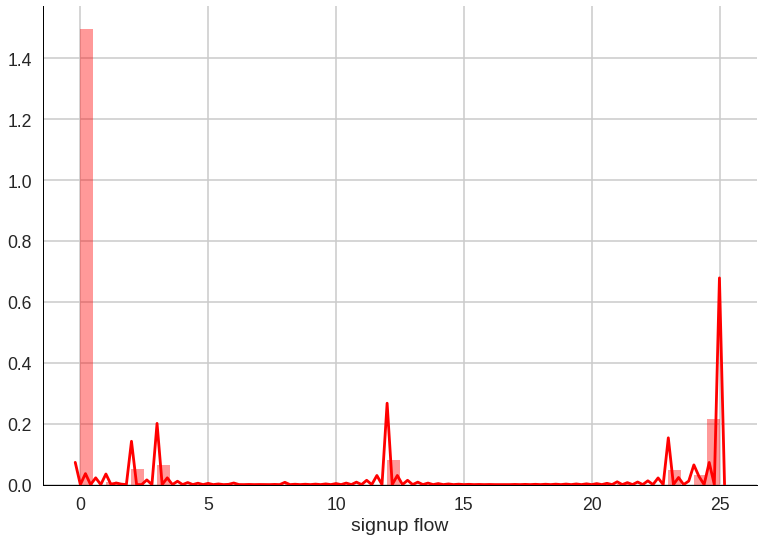

In [85]:
sns.distplot(users.signup_flow.dropna(), color='red')
plt.xlabel('signup flow')
sns.despine()